In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the csv

df = pd.read_csv("bike_crash.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20590 entries, 0 to 20589
Data columns (total 10 columns):
dispatch_ts      20590 non-null object
mode_type        20590 non-null object
location_type    20590 non-null object
street           8756 non-null object
xstreet1         18748 non-null object
xstreet2         18748 non-null object
x_cord           20590 non-null float64
y_cord           20590 non-null float64
lat              20590 non-null float64
long             20590 non-null float64
dtypes: float64(4), object(6)
memory usage: 1.6+ MB


In [3]:
# modifty date type

df = df[df.mode_type.isin(['bike'])]
df['dispatch_ts'] = pd.to_datetime(df['dispatch_ts'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2038 entries, 3 to 20589
Data columns (total 10 columns):
dispatch_ts      2038 non-null datetime64[ns, UTC]
mode_type        2038 non-null object
location_type    2038 non-null object
street           968 non-null object
xstreet1         1995 non-null object
xstreet2         1995 non-null object
x_cord           2038 non-null float64
y_cord           2038 non-null float64
lat              2038 non-null float64
long             2038 non-null float64
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 175.1+ KB


In [4]:
df[(df['dispatch_ts'] > '2015') & (df['dispatch_ts'] < '2016')].count()

dispatch_ts      502
mode_type        502
location_type    502
street           231
xstreet1         492
xstreet2         492
x_cord           502
y_cord           502
lat              502
long             502
dtype: int64

In [5]:
# df.head()

,dispatch_ts,mode_type,location_type,street,xstreet1,xstreet2,x_cord,y_cord,lat,long
3,2015-01-01 18:23:57+00:00,bike,Intersection,NaN,OLNEY ST,INWOOD ST,772710.48,2936614.62,42.305413,-71.069163
12,2015-01-02 22:27:44+00:00,bike,Street,KENSINGTON ST,DEAD END,ELMORE ST,766791.85,2942087.73,42.320623,-71.091094
26,2015-01-05 08:08:13+00:00,bike,Street,TERRACE ST,ALLEGHANY ST,CEDAR ST,764920.29,2945047.13,42.328734,-71.098052
30,2015-01-05 12:00:18+00:00,bike,Street,DORCHESTER AVE,ADAMS ST,ADAMS ST,775335.45,2935310.10,42.301826,-71.059716
104,2015-01-12 13:28:03+00:00,bike,Intersection,NaN,COMMONWEALTH AVE,HARVARD AVE,755895.54,2952987.13,42.350556,-71.131062


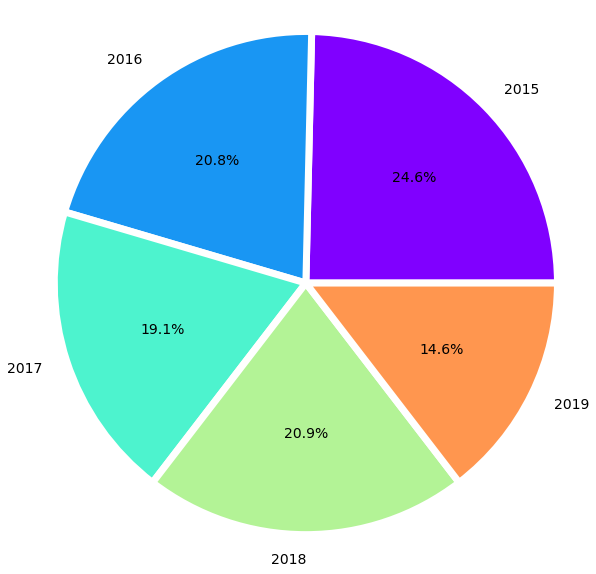

In [5]:
# plot the percentages of bike crash

from  matplotlib import cm
#visualize distributions using a doughnut plot 
f,ax = plt.subplots( figsize = (10,10) )
names =  [ '2015', '2016', '2017', '2018', '2019' ]
size = [df[(df['dispatch_ts'] > '2015') & (df['dispatch_ts'] < '2016')]['mode_type'].count() , df[(df['dispatch_ts'] > '2016') & (df['dispatch_ts'] < '2017')]['mode_type'].count(),
        df[(df['dispatch_ts'] > '2017') & (df['dispatch_ts'] < '2018')]['mode_type'].count() , df[(df['dispatch_ts'] > '2018') & (df['dispatch_ts'] < '2019')]['mode_type'].count(),
        df[(df['dispatch_ts'] > '2019') & (df['dispatch_ts'] < '2020')]['mode_type'].count()]
colors = cm.rainbow(np.arange(len(size))/len(size))
# my_circle = plt.Circle( (0,0), 0.7, color = 'white' )
ax.pie(size, labels = names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors=colors,textprops={'fontsize': 14},autopct='%1.1f%%')
# p = plt.gcf()
ax.axis('equal')
# p.gca().add_artist(my_circle)
plt.show()

C:\Users\synox\Anaconda3\envs\cs542\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\synox\Anaconda3\envs\cs542\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


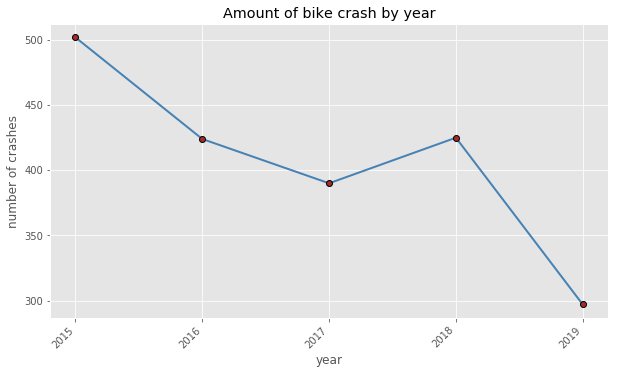

In [6]:
# plot trend of the bike crashes

plt. style.use("ggplot")
fig = plt.figure(figsize = (10,6))
plt.plot(names, # x data
         size, # y data
         linestyle = '-', # line type
         linewidth = 2, 
         color = 'steelblue', 
         marker = 'o', 
         markersize = 6, 
         markeredgecolor='black', 
         markerfacecolor='brown') 

plt.title('Amount of bike crash by year')
plt.xlabel('year')
plt.ylabel('number of crashes')

plt.tick_params(top = 'off', right = 'off')

# rotation 45°
fig.autofmt_xdate(rotation = 45)
plt.show()

In [7]:
#plot heat map for crashes

import gmplot

latitudes = df[(df['dispatch_ts'] > '2015') & (df['dispatch_ts'] < '2016')].lat
longitudes = df[(df['dispatch_ts'] > '2015') & (df['dispatch_ts'] < '2016')].long

gmap = gmplot.GoogleMapPlotter(42.349438, -71.060476, 10)
gmap.heatmap(latitudes, longitudes)
gmap.draw( "D:/jupyter_dir/bike_lane/crash_heatmap.html" )

<img src="./2015_crash_heat.png">
<center>The Bike crashes of Boston in 2015</center>

In [6]:
#load block data


df_block = pd.read_csv("bike_block.csv")

df_block['open_dt'] = pd.to_datetime(df_block['open_dt'])
df_block['target_dt'] = pd.to_datetime(df_block['target_dt'])
df_block['closed_dt'] = pd.to_datetime(df_block['closed_dt'])

# df_block.info()

df_block.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 29 columns):
case_enquiry_id                   518 non-null int64
open_dt                           518 non-null datetime64[ns]
target_dt                         496 non-null datetime64[ns]
closed_dt                         516 non-null datetime64[ns]
ontime                            518 non-null object
case_status                       518 non-null object
closure_reason                    518 non-null object
case_title                        518 non-null object
subject                           518 non-null object
reason                            518 non-null object
type                              518 non-null object
queue                             518 non-null object
department                        518 non-null object
submittedphoto                    280 non-null object
closedphoto                       53 non-null object
location                          518 non-null object
fire_dist

In [9]:
df_block.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101000308970,2011-08-01 14:56:41,2011-09-15 14:56:41,2011-08-01 15:27:50,ONTIME,Closed,Case Closed Case Resolved Cannot create a bike...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,...,A1,Boston,3,03,0306,1 City Hall Plz,2108.0,42.3603,-71.0583,Self Service
1,101000310917,2011-08-05 14:00:17,2011-08-19 14:00:17,2011-09-07 14:36:04,OVERDUE,Closed,Case Closed Case Noted PLease refer to Nicole ...,BTDT: Complaint,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,,,NaN,NaN,42.3594,-71.0587,Constituent Call
2,101000348345,2011-10-29 13:42:01,2011-11-02 13:42:00,2011-10-31 08:03:51,ONTIME,Closed,Case Closed Case Resolved no vehiclse blocking...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,D4,Back Bay,6,Ward 4,0402,138-148 Saint James Ave,2116.0,42.3491,-71.0762,Constituent Call
3,101000310264,2011-08-04 10:14:24,2011-09-18 10:14:24,2011-08-23 15:50:09,ONTIME,Closed,Case Closed Case Noted This request has to go ...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,...,E13,Jamaica Plain,10,Ward 19,1907,INTERSECTION Hyde Park Ave & Ukraine Way,NaN,42.2980,-71.1149,Self Service
4,101000317000,2011-08-21 17:04:07,2011-10-05 17:04:07,2011-08-23 15:48:52,ONTIME,Closed,Case Closed Case Noted This request has to go ...,New Sign Crosswalk or Pavement Marking,Transportation - Traffic Division,Signs & Signals,...,A1,Boston,3,03,0306,1 City Hall Plz,2108.0,42.3603,-71.0583,Self Service


In [16]:
#match the crashes and blocks

block_crash_dict = {}

for row in df_block.itertuples(index=True, name='Pandas'):
    block_crash_dict[getattr(row, "Index")]= []
    open = getattr(row, "open_dt")
    close = getattr(row, "closed_dt")
    lat =getattr(row, "latitude")
    long = getattr(row, "longitude")
    
    for row2 in df.itertuples(index=True, name='Pandas'):
        bool_date = (getattr(row2, "dispatch_ts").replace(tzinfo=None) <= close.replace(tzinfo=None) ) and (getattr(row2, "dispatch_ts").replace(tzinfo=None) >=open.replace(tzinfo=None))
        bool_location = (abs(getattr(row2, "lat") - lat) < 0.0001) and (abs(getattr(row2, "long") - long)< 0.0001)

        if(bool_date and bool_location):
            block_crash_dict[getattr(row, "Index")].append(getattr(row2, "Index"))    


In [17]:
for key, val in block_crash_dict.items():
    print(key, " : ", val)

0  :  []
1  :  []
2  :  []
3  :  []
4  :  []
5  :  []
6  :  []
7  :  []
8  :  []
9  :  []
10  :  []
11  :  []
12  :  []
13  :  []
14  :  []
15  :  []
16  :  []
17  :  []
18  :  []
19  :  []
20  :  []
21  :  []
22  :  []
23  :  []
24  :  []
25  :  []
26  :  []
27  :  []
28  :  []
29  :  []
30  :  []
31  :  []
32  :  []
33  :  []
34  :  []
35  :  []
36  :  []
37  :  []
38  :  []
39  :  []
40  :  []
41  :  []
42  :  []
43  :  []
44  :  []
45  :  []
46  :  []
47  :  []
48  :  []
49  :  []
50  :  []
51  :  []
52  :  []
53  :  []
54  :  []
55  :  []
56  :  []
57  :  []
58  :  []
59  :  []
60  :  []
61  :  []
62  :  []
63  :  []
64  :  []
65  :  []
66  :  []
67  :  []
68  :  []
69  :  []
70  :  []
71  :  []
72  :  []
73  :  []
74  :  []
75  :  []
76  :  []
77  :  []
78  :  []
79  :  []
80  :  []
81  :  []
82  :  []
83  :  []
84  :  []
85  :  []
86  :  []
87  :  []
88  :  []
89  :  []
90  :  []
91  :  []
92  :  []
93  :  []
94  :  []
95  :  []
96  :  []
97  :  []
98  :  []
99  :  []
100  :  []